# Lab:  Simple linear regression

In this lab, you will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model.  Before doing this lab, you can go through the [demo](./demo2_auto_mpg.ipynb) to see an example of these operations on an automobile dataset.  The lab use the Boston housing data set, a widely-used machine learning data set for illustrating basic concepts.  

## Loading the data

The Boston housing data set was collected in the 1970s to study the relationship between house price and various factors such as the house size, crime rate, socio-economic status, etc.  Since the variables are easy to understand, the data set is ideal for learning basic concepts in machine learning.  The raw data and a complete description of the dataset can be found on the UCI website:

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

In the lab, you will complete all the code marked `TODO`.

First, complete the following code that uses the `pd.read_csv` command to read the data from the file located at

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

I have supplied a list `names` of the column headers.  You will have to set the options in the `read_csv` command to correctly delimit the data in the file and name the columns correctly.

In [4]:
import pandas as pd
import numpy as np
names =[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
    'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'
]

# TODO:  Complete the code
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                   header=None, delim_whitespace=True, names=names, na_values='?')

<ipython-input-4-54b95ec576c3>:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',


Display the first six rows of the data frame

In [7]:
# TODO
df.head(6)
# TODO

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


## Basic Manipulations on the Data

What is the shape of the data?  How many attributes are there?  How many samples?
Print a statement of the form:

    num samples=xxx, num attributes=yy

In [9]:
# TODO
df.shape

(506, 14)

Create a response vector `y` with the values in the column `PRICE`.  The vector `y` should be a 1D `numpy.array` structure.

In [10]:
# TODO
y = df['PRICE'].values

Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $40k. (You may realize this is very cheap.  Prices have gone up a lot since the 1970s!).   Create print statements of the form:

    The mean house price is xx.yy thousands of dollars.
    Only x.y percent are above $40k.

In [13]:
# TODO
print("The mean house price is", y.mean(), "thousands of dollars.")
print("Only", (y > 40).mean(), "percent are above $40k.")

The mean house price is 22.532806324110677 thousands of dollars.
Only 0.06126482213438735 percent are above $40k.


## Visualizing the Data

Python's `matplotlib` has very good routines for plotting and visualizing data that closely follows the format of MATLAB programs.  You can load the `matplotlib` package with the following commands.

In [14]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, create a predictor vector `x` containing the values in the `RM` column, which represents the average number of rooms in each region.

In [15]:
# TODO
x = df['RM'].values

Create a scatter plot of the price vs. the `RM` attribute.  Make sure your plot has grid lines and label the axes with reasonable labels so that someone else can understand the plot.

Text(0, 0.5, 'Price')

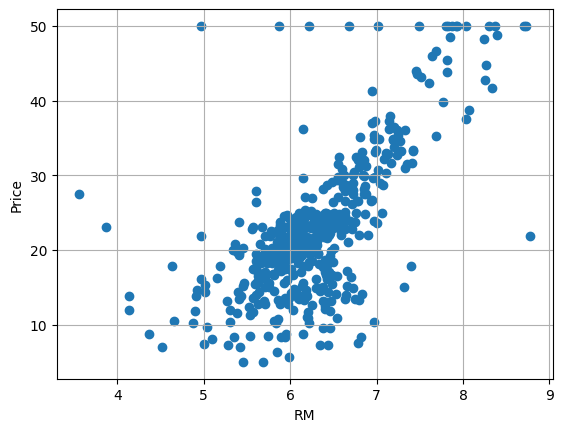

In [16]:
# TODO
plt.scatter(x, y)
plt.grid(True)
plt.xlabel('RM')
plt.ylabel('Price')

## Fitting a Simple Linear Model

We will write a simple function to perform a linear fit. Use the formulae given in the class, to compute the parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x + \epsilon$$ as well as the coefficient of determination $R^2$.

In [17]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       yhat = beta0 + beta1*x,
    The function returns beta0, beta1 and rsq, where rsq is the coefficient of determination.
    """
    # TODO complete the following code

    xm = np.mean(x)
    ym = np.mean(y)
    syy = np.mean((y-ym)**2)
    syx = np.mean((y-ym)*(x-xm))
    sxx = np.mean((x-xm)**2)

    beta1 = syx/sxx
    beta0 = ym - beta1*xm

    y_hat = beta0+beta1*x
    rsq = 1 - (np.sum((y - y_hat)**2) / syy)

    return beta0, beta1, rsq

Using the function `fit_linear` above, print the values `beta0`, `beta1` and `rsq` for the linear model of price vs. number of rooms.

In [18]:
# TODO
beta0, beta1, rsq = fit_linear(x,y)
print("beta0 =", beta0)
print("beta1 =", beta1)
print("rsq =", rsq)

beta0 = -34.67062077643857
beta1 = 9.10210898118031
rsq = -260.3361192683849


Replot the scatter plot above, but now with the regression line.  You can create the regression line by creating points `xp` from say 4 to 9, computing the linear predicted values `yp` on those points and plotting `yp` vs. `xp` on top of the above plot.

Text(0.5, 1.0, 'Scatter Plot with Regression Line')

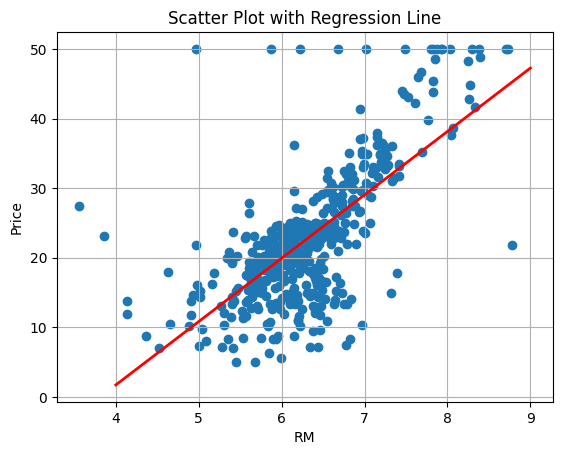

In [21]:
# TODO
xp = np.array([4, 9])
yp = beta0 + beta1*xp
plt.scatter(x, y)
plt.grid(True)
plt.xlabel('RM')
plt.ylabel('Price')
plt.plot(xp, yp, color='red', linewidth=2, label='Regression Line')
plt.title('Scatter Plot with Regression Line')

# Compute coefficients of determination

We next compute the $R^2$ values for all the predictors and output the values in a table. Your table should look like the following, where each the first column is the attribute name and the second column is the $R^2$ value.

    CRIM        0.151
    ZN          0.130
    INDUS       0.234
    ...         ...

To index over the set of colunms in the dataframe `df`, you can either loop over the items in the `names` lists (skipping over the final name `PRICE`) or loop over integer indices and use the method, `df.iloc`.

In [24]:
# TODO
num_cols = len(names) - 1  # Exclude 'PRICE' column

for i in range(num_cols):
    column_data = df.iloc[:, i]  # Select all rows (:) and the i-th column
    # Now you can work with the data in the current column
    print(f"Column {names[i]}:")
    print(column_data.head())  # Print the first few values as an example
    # Example: Calculate the mean of the column
    mean_value = column_data.mean()
    print(f"Mean: {mean_value}")

for name in names[:-1]:  # Iterate through all names except the last one ('PRICE')
    column_data = df[name]  # Select the column by name
    # Now you can work with the column data
    print(f"Column {name}:")
    print(column_data.head())
    # Example: Calculate the standard deviation
    std_dev = column_data.std()
    print(f"Standard Deviation: {std_dev}")

Column CRIM:
0    0.00632
1    0.02731
2    0.02729
3    0.03237
4    0.06905
Name: CRIM, dtype: float64
Mean: 3.613523557312254
Column ZN:
0    18.0
1     0.0
2     0.0
3     0.0
4     0.0
Name: ZN, dtype: float64
Mean: 11.363636363636363
Column INDUS:
0    2.31
1    7.07
2    7.07
3    2.18
4    2.18
Name: INDUS, dtype: float64
Mean: 11.13677865612648
Column CHAS:
0    0
1    0
2    0
3    0
4    0
Name: CHAS, dtype: int64
Mean: 0.0691699604743083
Column NOX:
0    0.538
1    0.469
2    0.469
3    0.458
4    0.458
Name: NOX, dtype: float64
Mean: 0.5546950592885376
Column RM:
0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64
Mean: 6.284634387351779
Column AGE:
0    65.2
1    78.9
2    61.1
3    45.8
4    54.2
Name: AGE, dtype: float64
Mean: 68.57490118577076
Column DIS:
0    4.0900
1    4.9671
2    4.9671
3    6.0622
4    6.0622
Name: DIS, dtype: float64
Mean: 3.795042687747036
Column RAD:
0    1
1    2
2    2
3    3
4    3
Name: RAD, dtype: int64
Mean: 9.